# Kepler and the Orbit of Mars


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PhysData/course/blob/main/docs/notebooks/kepler.ipynb)

In this notebook we will use modern techniques and programming to emulate, visualise and validate Kepler's work, demonstrating the [similarities](https://lih-verma.medium.com/kepler-was-a-data-scientist-b90b21315c85) between his methods and 'data science' as we know it today.

If you would like to execute or interact with the code, select the 'Open in Colab' option!


## Triangulation

Through the knowledge of Mars's 687 day orbital period, Kepler was able to plot the positions of Mars in its orbit with a [triangulation](https://faculty.uca.edu/saustin/3110/mars.pdf) technique. He used pairs of Brahe's data points which were separated by an integer multiple of 687 days, due to the fact that Mars would be in the same place relative to the Sun, to triangulate the position of Mars using the difference between its apparent position in the sky in each case and hence track its orbit.

![](../media/Triangulation.png)

[Source: http://galileo.phys.virginia.edu/classes/609.ral5q.fall04/LecturePDF/L08-KEPLER.pdf]

### Visualising Earth Locations

The following code uses a small data set of Mars locations to mimick Kepler's work and create a visualisation of Earth's orbit.

In [25]:
# If you're running this notebook, uncomment the code in this cell to install the required packages.
# ! pip install csv
# ! pip install math
# ! pip install matplotlib
# ! pip install numpy
# ! pip install mpl_toolkits

In [1]:
import csv
import math
import matplotlib.pyplot as plt

def loadData1():

	tri = "../data/triangulation.csv"
	fields = []
	earthLocations = [] 
	marsAngles = []

	with open(tri, 'r') as trifile:
		triangulation = csv.reader(trifile)
		fields = next(triangulation)

		for row in triangulation:

			earthAngle = math.radians(float(row[4]) + (float(row[5])/60))
			xEarth = math.cos(earthAngle)
			yEarth = math.sin(earthAngle)
			earthLocations.append([xEarth, yEarth])

			marsAngle = math.radians(float(row[6]) + (float(row[7])/60))
			marsAngles.append(marsAngle)

	return earthLocations, marsAngles


def plotEarthLocations(earthLocations):

	fig, ax = plt.subplots()

	ax.plot(0, 0, 'yo', markersize=10, label="Sun")

	xEarth, yEarth = [], []
	for location in earthLocations:
		xEarth.append(location[0])
		yEarth.append(location[1])

	ax.plot(xEarth, yEarth, 'bo', markersize=5, label="Earth Locations")

	ax.legend(fontsize='x-small')
	plt.show()


def findMars(earthLocation1, marsAngle1, earthLocation2, marsAngle2):

	x1, y1 = earthLocation1
	ma1 = marsAngle1

	x2, y2 = earthLocation2
	ma2 = marsAngle2

	xMars = ((y2 - y1 + (x1 * math.tan(ma1)) - (x2 * math.tan(ma2)))
			/ (math.tan(ma1) - math.tan(ma2)))

	yMars = ((x2 - x1 + (y1 * (1 / math.tan(ma1)))
			- (y2 * (1 / math.tan(ma2))))
			/ ((1 / math.tan(ma1)) - (1 / math.tan(ma2))))

	marsLocation = [xMars, yMars]
	return marsLocation


def computeRadius(marsLocations):

	rMars = []
	for i in range(len(marsLocations)):
		xMars, yMars = marsLocations[i]
		sqDist = math.pow(xMars, 2) + math.pow(yMars, 2)
		rMars.append(math.sqrt(sqDist))

	r = sum(rMars) / len(rMars)
	
	return r

def plotTriangulations(marsLocations, radius):

	fig, ax = plt.subplots()

	ax.plot(0, 0, 'yo', markersize=12)

	xMars, yMars = [], []
	for location in marsLocations:
		mx, my = location
		xMars.append(mx)
		yMars.append(my)
	ax.plot(xMars, yMars, 'ro', markersize=5, label="Mars's Projection")

	if radius is not None:
		fit = plt.Circle((0,0), radius, color='g', fill=False,
			label="Best-fit circle")
		ax.add_artist(fit)
		s = "Best-fit radius = " + str(round(radius, 4))
		ax.text(0.75, -2, s, fontsize=7)

	lim = 2.2
	ax.set_xlim(-lim, lim)
	ax.set_ylim(-lim, lim)
	ax.set_aspect('equal')
	ax.legend(fontsize='x-small')
	
	plt.show()


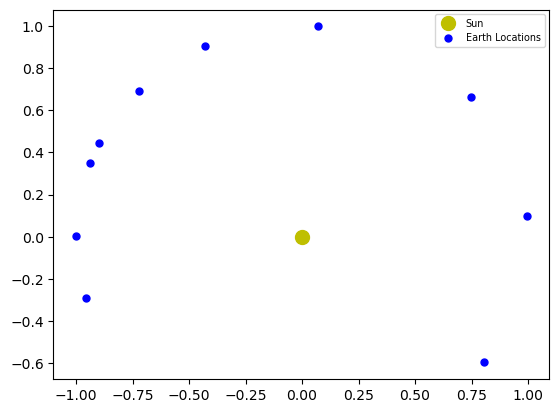

In [2]:
earthLocations = None
marsAngles = None

earthLocations, marsAngles = loadData1()

plotEarthLocations(earthLocations)

### Finding five positions of Mars

Next, pairs of Earth positions separated by a multiple of 687 days and their corresponding angles to mars are used to triangulate the locations of Mars, which are recorded.

In [3]:
marsLocations = []

for i in range(5):
    index1 = 2 * i
    index2 = 2 * i + 1
    marsLocation = findMars(earthLocations[index1], marsAngles[index1],
                                        earthLocations[index2], marsAngles[index2])
    marsLocations.append(marsLocation)

print(marsLocations)

[[-1.45297367276038, 0.865533530153104], [1.195672782788594, -0.6868566346181089], [1.073885314206997, 1.051106927548351], [-1.6323045900130566, -0.1485417987157833], [-1.5537673314861349, 0.6248989852957586]]


### Fitting a circle for the Orbit

Having recorded the positions of Mars, the natural continuation for Kepler was to attempt to fix these to a circular orbit - the Copernican model of the solar system to which he subscribed predicted that the planets took circular orbits around the Sun.

In the following visualisation it is clear that the data points do not quite follow the trajectory of a circle.

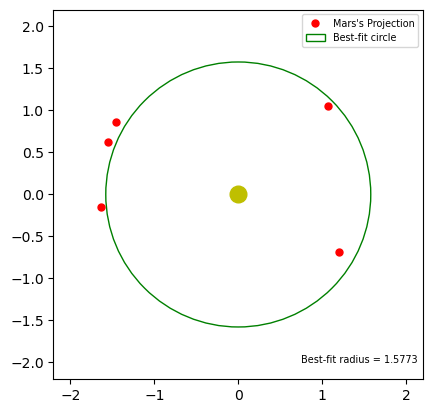

In [4]:
triangulatedRadius = None

triangulatedRadius = computeRadius(marsLocations)

plotTriangulations(marsLocations, triangulatedRadius)

## Fitting the Mars Orbital Plane

So far, all of the data has been in two dimensions - projections of Mars onto the ecliptic plane, which is the orbital plane of Earth around the Sun. In order to find the actual Mars locations in three-dimensional space, Kepler used 'perihelic opposition' - when Ears, the Sun, and Mars lie on a straight line to deduce Mars's orbital plane, as in this case the angle to Mars is the same from both the Sun and Earth.

The longitudes to Mars with respect to the Sun and latitudes to Mars with respect to the Earth can be used to calculate the coordinates of Mars on the celestial sphere - an abstract sphere with an arbitrarily large radius which is concentric to Earth: geocentric latitudes are first used to calculate heliocentric latitudes, which together with longitudes can locate Mars via points of intersection.

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def evaluateDistance(coordinates, a, b):

	normal = np.array([a, b, 1.0])[:,None]

	scale = math.pow(a, 2) + math.pow(b, 2) + 1.0

	distance = np.dot(coordinates, normal) / scale

	squareDist = float(sum(distance ** 2))
	return squareDist


def computeGradient(coordinates, a, b):

	normal = np.array([a, b, 1.0])[:,None]

	scale = math.pow(a, 2) + math.pow(b, 2) + 1.0

	linearSum = np.dot(coordinates, normal)

	scaledX = np.array([coordinates[:, 0] * scale]).T 
	scaledY = np.array([coordinates[:, 1] * scale]).T 
	partialScale = (2 / (math.pow(scale, 3)))          

	partialA = partialScale * ((-2 * a * linearSum) + scaledX) * linearSum
	partialB = partialScale * ((-2 * b * linearSum) + scaledY) * linearSum 

	gradient = [float(sum(partialA)), float(sum(partialB))]
	return gradient


def findPlane(coordinates):

	coordinateMatrix = np.array(coordinates).T

	a, b = 0.0, 0.0

	alpha = 0.0001

	cost = []

	for i in range (10000):
		
		squareDist = evaluateDistance(coordinateMatrix, a, b)

		cost.append(squareDist)
		
		delta = computeGradient(coordinateMatrix, a, b)
		
		a = a - (alpha * delta[0])
		b = b - (alpha * delta[1])

	planeParams = [a, b]

	return planeParams

def loadData2():

	opp = "../data/opposition.csv"
	fields = []     
	helioLong = []    
	geoLat = []        

	with open(opp, 'r') as oppfile:
		opposition = csv.reader(oppfile)
		fields = next(opposition)

		for row in opposition:

			helioLong.append(math.radians((30 * float(row[3])) + float(row[4]) 
				+ (float(row[5])/60) + (float(row[6])/3600)))

			geoLat.append(math.radians(float(row[7]) + (float(row[8])/60)))

	return helioLong, geoLat


def findHelioLat(radius, geoLat):

	helioLat = []
	scale = (radius - 1)/radius
	for angle in geoLat:
		helioLat.append(math.atan(scale * math.tan(angle)))

	return helioLat


def findCoordinates(helioLong, helioLat):
	
	xMars = []
	yMars = []
	zMars = []

	# Given the radius of celestial sphere, latitude and longitude of mars, 
	# we have spherical coordinates of Mars.
	# Spherical coordinates can be converted to cartesian using the formula:
	# 	x = radius * cos(pi/2 - latitude) * cos(longitude)
	# 	y = radius * sin(pi/2 - latitude) * sin(longitude)
	#   z = radius * cos(pi/2 - latitude)
	for i in range(len(helioLat)):
		xMars.append(math.sin((math.pi / 2.0)-helioLat[i]) 
					* math.cos(helioLong[i]))
		yMars.append(math.sin((math.pi / 2.0)-helioLat[i]) 
					* math.sin(helioLong[i]))
		zMars.append(math.cos((math.pi / 2.0)-helioLat[i]))

	coordinates = [xMars, yMars, zMars]
	return coordinates


def fitPlane(coordinates):

	planeParameters = findPlane(coordinates)
	return planeParameters


def plotPlane(coordinates, planeParams):

	a, b = planeParams
	xMars, yMars, zMars = coordinates

	fig = plt.figure()
	ax = Axes3D(fig)

	ax.scatter(xMars, yMars, zMars, 'r')
	ax.scatter(0.0, 0.0, 0.0, 'y')

	point = np.array([0.0, 0.0, 0.0])
	normal = np.array([a, b, 1.0])
	d = -point.dot(normal)
	xx, yy = np.meshgrid(range(-2, 3), range(-2, 3))
	zm = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
	ax.plot_surface(xx, yy, zm, alpha=0.2, color='b',
		label="Mars Orbital Plane")

	ze = yy * 0.0
	ax.plot_surface(xx, yy, ze, alpha=0.2, color='y', label="Ecliptic Plane")

	plt.show()


def findInclination(planeParams):

	a, b = planeParams
	angle = math.acos(1/(math.sqrt(math.pow(a, 2) + math.pow(b, 2) + 1.0)))
	return math.degrees(angle)


In [6]:
helioLong, geoLat = loadData2()

helioLat = []

helioLat = findHelioLat(triangulatedRadius, geoLat)


coordinates = []

coordinates = findCoordinates(helioLong, helioLat)

### Fitting a Plane for the Orbit of Mars

From the coordinates of Mars on the celestial sphere, we can fit a plane for the orbit of Mars. First we will find the parameters of this plane, and then we can plot our results!

C:\Users\jacob\AppData\Local\Temp\ipykernel_21304\1008367276.py:127: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


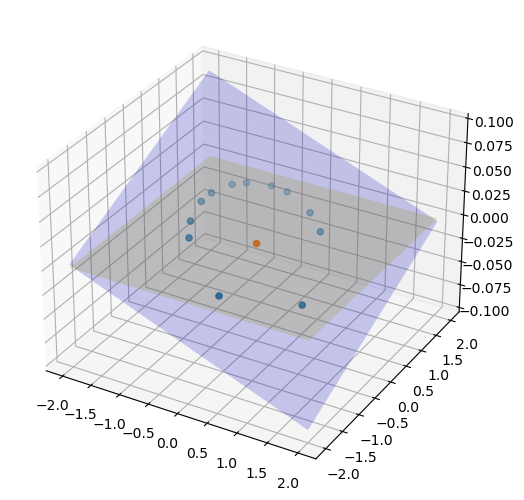

In [7]:
planeParameters = []

planeParameters = fitPlane(coordinates)

plotPlane(coordinates, planeParameters)

## Fitting a Circle & Ellipse for the Mars Orbit

### Lifting Mars Projections onto Orbital Plane

The following code takes our initial coordinates for the locations of mars and 'lifts' them onto the orbital plane that we found.

In [20]:
from matplotlib.patches import Ellipse

def evaluateDistance(xMars, yMars, xFocus, yFocus, majorAxis):

	dist = []

	for i in range(len(xMars)):
		distOrigin = math.sqrt(math.pow(xMars[i], 2) + math.pow(yMars[i], 2))
		distFocus = math.sqrt(math.pow((xMars[i] - xFocus), 2) 
			+ math.pow((yMars[i] - yFocus), 2))
		dist.append(math.pow((distOrigin + distFocus - majorAxis), 2))

	squareDist = sum(dist)
	return squareDist


def computeGradient(xMars, yMars, xFocus, yFocus, majorAxis):

	dxFocus = []
	dyFocus = []
	dmajorAxis = []

	# df/d(xFocus) = (-2 * (xMars - xFocus) * evaluateDistance) / distFocus
	# df/d(yFocus) = (-2 * (yMars - yFocus) * evaluateDistance) / distFocus
	# df/d(majorAxis) = -2 * evaluateDistance

	# computing partial derivatives for each set of coordinates
	for i in range(len(xMars)):
		distOrigin = math.sqrt(math.pow(xMars[i], 2) + math.pow(yMars[i], 2))
		distFocus = math.sqrt(math.pow((xMars[i] - xFocus), 2) 
			+ math.pow((yMars[i] - yFocus), 2))
		dist = distOrigin + distFocus - majorAxis

		xDiff = xMars[i] - xFocus
		yDiff = yMars[i] - yFocus

		dxFocus.append((-2 * xDiff * dist) / distFocus)
		dyFocus.append((-2 * yDiff * dist) / distFocus)
		dmajorAxis.append(-2 * dist)

	gradient = [float(sum(dxFocus)), 
				float(sum(dyFocus)), 
				float(sum(dmajorAxis))]
	return gradient


def findEllipse(xMars, yMars, xf, yf, axis):

	alpha = 0.001

	cost = []

	for i in range (10000):	
		squareDist = evaluateDistance(xMars, yMars, xf, yf, axis)

		cost.append(squareDist)

		delta = computeGradient(xMars, yMars, xf, yf, axis)

		xf   = xf - (alpha * delta[0])
		yf   = yf - (alpha * delta[1])
		axis = axis - (alpha * delta[2])

	return xf, yf, axis, cost



def liftCoordinates(planeParams, marsTriLocations):

	a, b = planeParams

	# x-y coordinates of Mars will be the same as the projections
	# to calculate z coordinates, we must use the formula as follows:
	# zMars = (-a * xMars) + (-b * yMars), where a and b are the parameters of the best-fit plane
	liftedLocations = []
	for location in marsTriLocations:
		xMars, yMars = location
		zMars = (-1 * a * xMars) + (-1 * b * yMars)
		liftedLocations.append([xMars, yMars, zMars])
	
	return liftedLocations


def fitCircle(liftedLocations):

	# Finding the distance of each point from the origin
	rMars = []
	for location in liftedLocations:
		xMars, yMars, zMars = location
		sqDist = math.pow(xMars, 2) + math.pow(yMars, 2) + math.pow(zMars, 2)
		rMars.append(math.sqrt(sqDist))

	# Finding the average radius, which is the radius of the best fit circle
	r = sum(rMars) / len(rMars)

	loss = 0.0 
	for radius in rMars:
		loss = loss + math.pow((r - radius), 2)

	return r, loss


def fitEllipse(liftedLocations):

	xMars, yMars, zMars = [], [], []
	for location in liftedLocations:
		x, y, z = location
		xMars.append(x); yMars.append(y); zMars.append(z)

	xf1, yf1, axis1 = 0.0, 0.0, 0.0

	# finding the best fit ellipse
	xf, yf, axis, cost = findEllipse(xMars, yMars, 
		xf1, yf1, axis1)

	ellipseParameters = [xf, yf, axis] 
	loss = cost[-1]                     
	return ellipseParameters, loss


def plotBoth(liftedLocations, circleRadius, ellipseParameters):

	xMars, yMars, zMars = [], [], []
	for location in liftedLocations:
		x, y, z = location
		xMars.append(x); yMars.append(y); zMars.append(z)

	xf, yf, axis = ellipseParameters

	centerX = xf / 2.0
	centerY = yf / 2.0
	interFocii = math.sqrt(math.pow(xf, 2) + math.pow(yf, 2))
	minorAxis = math.sqrt(math.pow(axis, 2) - math.pow(interFocii, 2))
	rotationAngle = 360 - math.degrees(math.atan(yf / abs(xf)))

	fig, ax = plt.subplots()

	# plotting mars locations and the focii
	ax.plot(xMars, yMars, "ro")
	ax.plot(0.0, 0.0, "yo", label="Sun")
	#ax.plot(xf, yf, "go", label="Ellipse Focus #2")

	# adding best fit circle
	fit_c = plt.Circle((0,0), circleRadius, color='c', fill=False, 
		label="Best-fit Circle")
	ax.add_artist(fit_c)

	# adding best fit ellipse
	fit_e = Ellipse((centerX, centerY), axis, minorAxis, rotationAngle, 
		color='b', fill=False)
	ax.add_artist(fit_e)

	ax.set_xlim(-2.2, 2.2)
	ax.set_ylim(-2.2, 2.2)
	ax.set_aspect('equal')

	ax.legend([fit_c, fit_e], ['Best-fit Circle', 'Best-fit Ellipse'], 
		fontsize='x-small')

	plt.show()

In [21]:
liftedMarsLocations = None

liftedMarsLocations = liftCoordinates(planeParameters, marsLocations)

print(liftedMarsLocations)

[[-1.45297367276038, 0.865533530153104, 0.053480164984036856], [1.195672782788594, -0.6868566346181089, -0.04344804198022778], [1.073885314206997, 1.051106927548351, -0.0021506934736226224], [-1.6323045900130566, -0.1485417987157833, 0.03530286825450773], [-1.5537673314861349, 0.6248989852957586, 0.050543527165771096]]


We now have the true locations of Mars on its orbital plane. Now, let's try to fit a circular orbit and an elliptical orbit and compare the errors. 

From this we should expect to find a lower error for an ellipse in line with Kepler's results.

### Fitting a Circle for the Orbit

The fllowing code plots a 'circle of best fit' to the orbit of Mars using the distances between the locations of Mars and the Sun to calculate a mean radius. The total error is then calculated using the individual errors of each location and the circle.

In [22]:
circleRadius = None
circleLoss = None

circleRadius, circleLoss = fitCircle(liftedMarsLocations)

print("Circle Radius:", circleRadius)
print("Circle Error (absolute):", circleLoss)

circlePercentageError = math.sqrt(circleLoss) / circleRadius * 100.0
print("Circle Error (percentage):", circlePercentageError)

Circle Radius: 1.5778556961885206
Circle Error (absolute): 0.07132670609823943
Circle Error (percentage): 16.926174046310894


### Fitting an Ellipse for the Orbit

Similarly, the following code plots an 'ellipse of best fit', calculating the error in the same way.

In [23]:
ellipseParameters = None
ellipseLoss = None

ellipseParameters, ellipseLoss = fitEllipse(liftedMarsLocations)

print("Ellipse Parameters:", ellipseParameters)
print("Ellipse Error (absolute):", ellipseLoss)

semimajorAxis = ellipseParameters[2] / 2.0
ellipsePercentageError = math.sqrt(ellipseLoss) / semimajorAxis * 100.0
print("Ellipse Error (percentage):", ellipsePercentageError)

Ellipse Parameters: [-0.240552111180818, 0.1985421023207515, 3.0678768713386857]
Ellipse Error (absolute): 0.0002424791593356513
Ellipse Error (percentage): 1.0151478033615156


### Comparing Circular and Elliptical Orbital Error

We find that fitting a circle has approximately 16 times the error of fitting an ellipse, thus, the orbit of Mars must be elliptical! We can plot both models into one figure to display this.

### Plotting Comparison of Circular and Elliptical Orbits

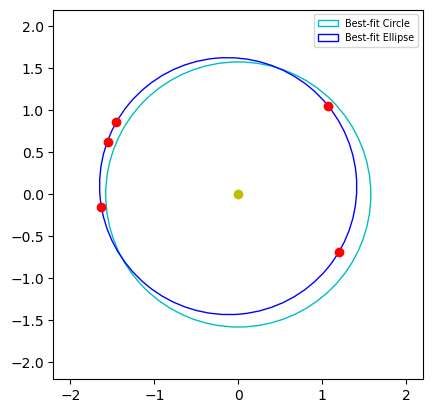

In [24]:
plotBoth(liftedMarsLocations, circleRadius, ellipseParameters)

The plot allows us to clearly see that the ellipse passes through all of our data points to a reasonable error whereas the circle is comparatively skewed. Thus we have validated and visualised Kepler's results! 

### How could we analyse Brahe's data today?

Due to the evolution of data science and technology in the centries since Kepler carried out his work, today, a neural network could be used to analyse Tycho Brahe's observations, recognise patterns and relationships in the data and model an orbit. The advantage of this technique is that Kepler's moment of inspiration to consider the possibility of an elliptical orbit would not have been necessary, not to mention that over 20 years of work would have been reduced to just a matter of minutes! 

The following animation is another example how we can use modern programming languages to study orbits further; we can investigate the initial conditions necessary for periodic or chaotic motion, and also consider how massive objects can cause perturbations in orbits.

![](../media/Orbit_gif.gif)

[Source: https://towardsdatascience.com/use-python-to-create-three-body-orbits-329ffb5b2627]

## References

* [Orbits and Kepler's Laws](https://solarsystem.nasa.gov/resources/310/orbits-and-keplers-laws/#:~:text=Kepler's%20Laws%20of%20Planetary%20Motion&text=They%20describe%20how%20(1)%20planets,its%20semi%2Dmajor%20axis)

* Gentner, Dedre, et al. Analogical reasoning and conceptual change: A case study of Johannes Kepler. The journal of the learning sciences 6.1 (1997): 3-40.

* [Understanding What Kepler Did](http://www.ams.org/publicoutreach/feature-column/fc-2018-11)

* [Use Python to Create Three-Body Orbits](https://towardsdatascience.com/use-python-to-create-three-body-orbits-329ffb5b2627)

* [Kepler was a Data Scientist](https://lih-verma.medium.com/kepler-was-a-data-scientist-b90b21315c85)

* [Johannes Kepler and Tycho Brahe](http://galileo.phys.virginia.edu/classes/609.ral5q.fall04/LecturePDF/L08-KEPLER.pdf)

* [Determination of the Orbit of Mars Using Kepler's Triangulation Technique](https://faculty.uca.edu/saustin/3110/mars.pdf)


The code for this section was adapted from material at https://github.com/pulkitsingh/Mars-Orbit-Workshop.

If you wish to get an overview of the remaining topics in this course, click the button below.

[![Back to main website](../media/back4.png)](https://physdata.vercel.app/)